# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

# **QUESTION - 1**

# Importing Data

In [ ]:
fraud=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Decision%20Tree/Fraud_check.csv')

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
##assigning the y variable (<=30000 as risky and >30000 as good)
fraud.loc[fraud['Taxable.Income'] <=30000,'Taxable_Income']= 'Risky'
fraud.loc[fraud['Taxable.Income'] >30000,'Taxable_Income']= 'Good'

In [ ]:
fraud.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [ ]:
fraud.drop('Taxable.Income',inplace=True,axis=1)

In [ ]:
fraud.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good


In [ ]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Taxable_Income   600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [ ]:
label_encoder=preprocessing.LabelEncoder()
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])

In [ ]:
fraud['Marital.Status'].unique()

array([2, 0, 1])

In [ ]:
fraud.Undergrad.value_counts()


YES    312
NO     288
Name: Undergrad, dtype: int64

In [ ]:
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])


In [ ]:
fraud.Undergrad.unique()


array([0, 1])

In [ ]:
fraud.Urban.value_counts()


YES    302
NO     298
Name: Urban, dtype: int64

In [ ]:
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])


In [ ]:
fraud.Urban.unique()


array([1, 0])

In [ ]:
fraud.head(2)


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good


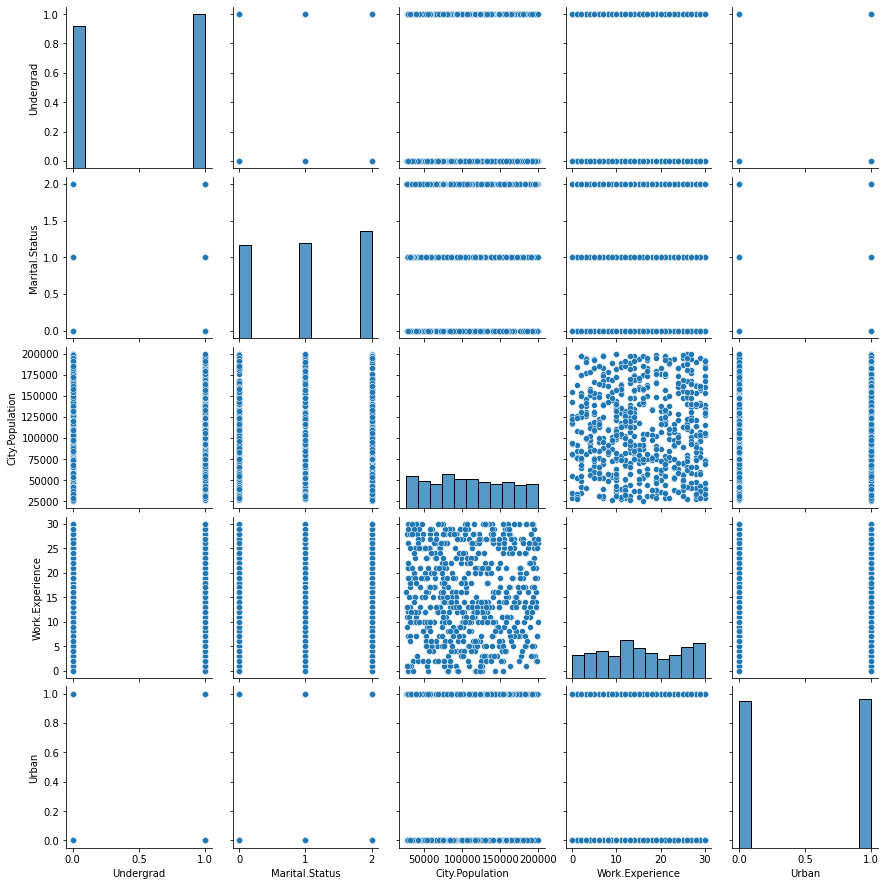

In [ ]:
sns.pairplot(fraud)


In [ ]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [ ]:
target


'Taxable_Income'

In [ ]:
predictors


['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [ ]:
train,test = train_test_split(fraud,test_size = 0.2, random_state=1)


In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

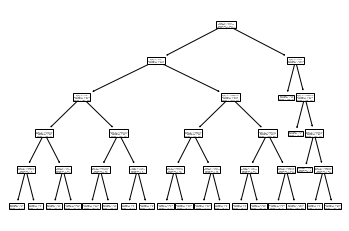

In [ ]:
tree.plot_tree(model);

In [ ]:
preds = model.predict(test[predictors])

In [ ]:
pd.Series(preds).value_counts()
pd.crosstab(test[target],preds)

col_0,Good,Risky
Taxable_Income,,
Good,89,8
Risky,22,1


In [ ]:
np.mean(preds==test[target])


0.75

# **QUESTION - 2**

# Importing Data

In [ ]:
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Decision%20Tree/Company_Data.csv")


In [ ]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
data.loc[data['Sales'] >=8.5,'sales']= 'high'
data.loc[data['Sales'] <8.5,'sales']= 'low'

In [ ]:
data.drop('Sales',axis=1,inplace=True)


In [ ]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [ ]:
data.ShelveLoc.value_counts()


Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['US']=label_encoder.fit_transform(data['US'])
data['US'].unique()

array([1, 0])

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])

In [ ]:
data.head(2)


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high


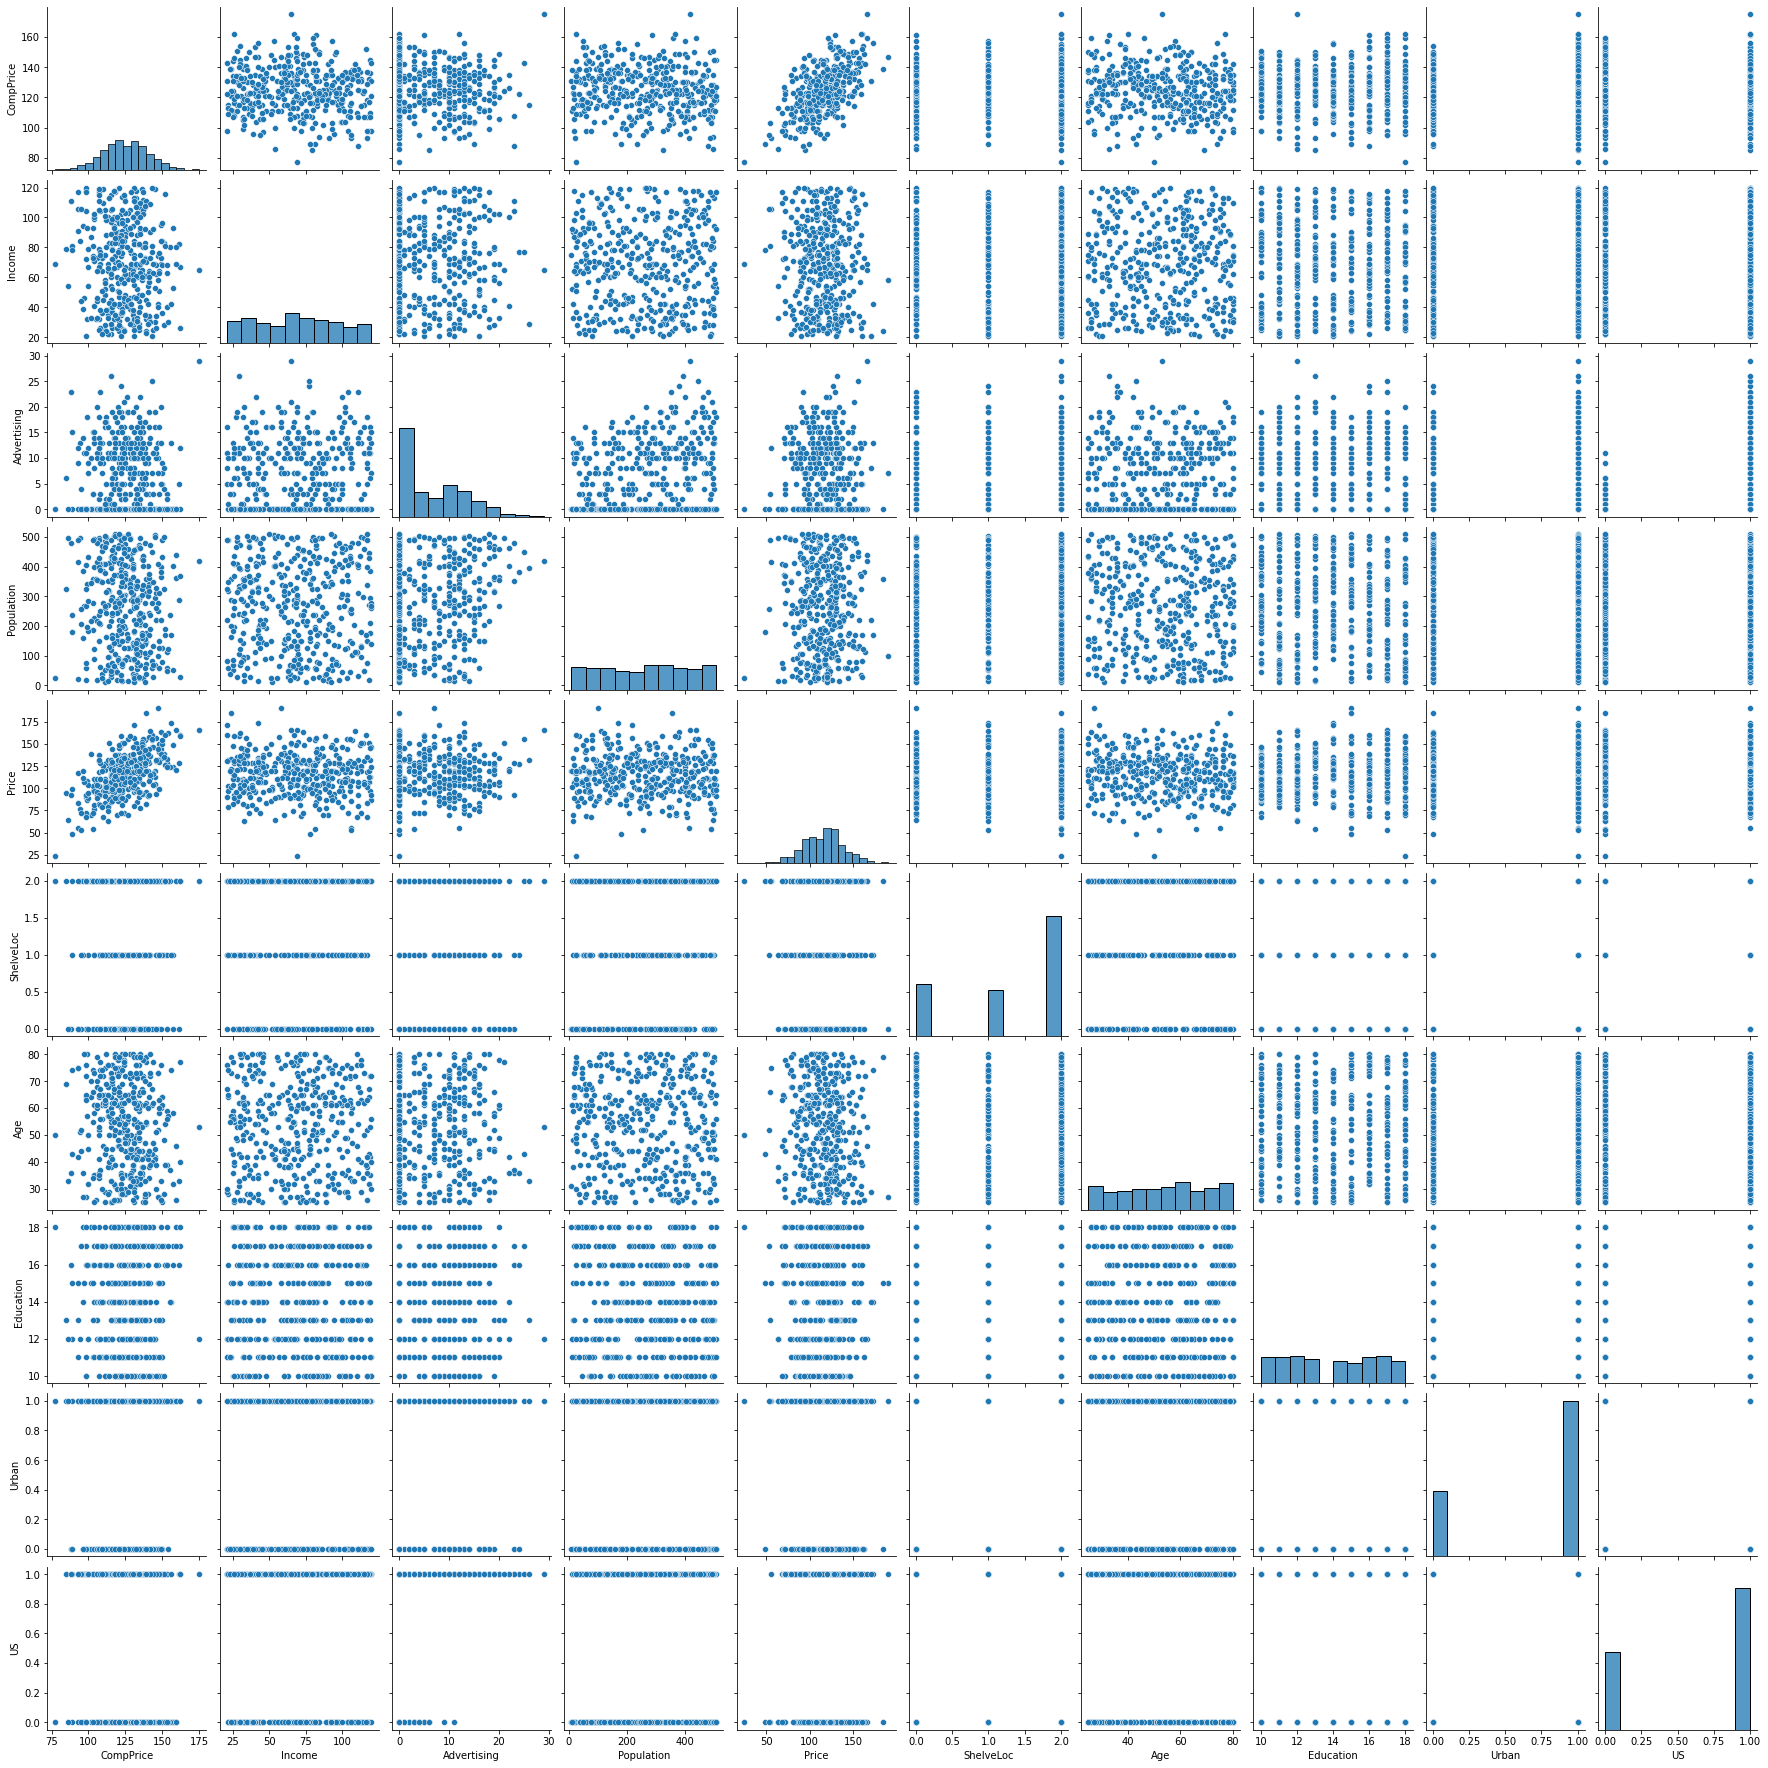

In [ ]:
sns.pairplot(data)


In [ ]:
colnames = list(data.columns)
predictors = colnames[0:10]
target = colnames[10]

In [ ]:
predictors


['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
target


'sales'

In [ ]:
data.dtypes


CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc       int64
Age             int64
Education       int64
Urban           int64
US              int64
sales          object
dtype: object

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
data['sales']= label_encoder.fit_transform(data['sales'])

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size = 0.2,random_state=4)

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

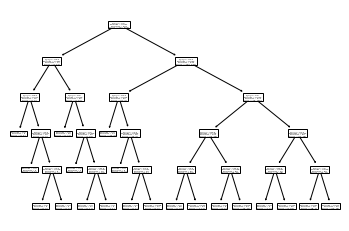

In [ ]:
tree.plot_tree(model);

In [ ]:
preds = model.predict(test[predictors])


In [ ]:
preds


array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
pd.Series(preds).value_counts()

pd.crosstab(test[target],preds)

col_0,0,1
sales,,
0,23,9
1,11,37


In [ ]:
np.mean(preds==test[target])


0.75